In [25]:
from keras.applications.vgg19 import VGG19
from keras.models import Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [17]:
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))
for layer in base_model.layers[:-5]:
    layer.trainable = False

output = base_model.output
x = GlobalAveragePooling2D()(output)
x = Dense(1024, activation='relu')(x)
x = Dense(13, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

In [19]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=5)

model_chkpt = ModelCheckpoint('skeez.h5',
                              monitor='val_loss', verbose=1, 
                              save_best_only=True)
batch_size = 32
nb_classes = 23
nb_epoch = 20
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# The CIFAR10 images are RGB.
img_channels = 3
train_path='dataaaaaa/train'
test_path='dataaaaaa/test'
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./ 255)

In [20]:
classes = ['Acne','Actnic Cheilitis','Basal Cell Carcinoma','Eczema Photos','Hair Disease','Nail Fungal','Psoriasis Hair','Rosacea',' Scabies',' Seborrheic Keratoses','Skin Cancer','Tinea Ringworm Candidiasis','Warts Molluscum']
len(classes)

13

In [21]:
train_data=train_datagen.flow_from_directory(train_path,classes=classes,target_size=(32,32),batch_size=16)
test_data=test_datagen.flow_from_directory(test_path,classes=classes,target_size=(32,32),batch_size=16)

Found 4222 images belonging to 13 classes.
Found 569 images belonging to 13 classes.


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history=model.fit_generator(train_data,
                            validation_data=test_data,
                            epochs=50,
                            verbose=1, callbacks=[lr_reducer, model_chkpt])

Epoch 1/50
264/264 [==============================] - 16s 58ms/step - loss: 1.0407 - accuracy: 0.6606 - val_loss: 1.0867 - val_accuracy: 0.6221

Epoch 00001: val_loss improved from 1.09295 to 1.08674, saving model to skeez.h5
Epoch 2/50
264/264 [==============================] - 14s 53ms/step - loss: 1.0276 - accuracy: 0.6611 - val_loss: 1.1586 - val_accuracy: 0.6520

Epoch 00002: val_loss did not improve from 1.08674
Epoch 3/50
264/264 [==============================] - 15s 58ms/step - loss: 1.0246 - accuracy: 0.6649 - val_loss: 0.9746 - val_accuracy: 0.6819

Epoch 00003: val_loss improved from 1.08674 to 0.97462, saving model to skeez.h5
Epoch 4/50
264/264 [==============================] - 15s 57ms/step - loss: 0.9682 - accuracy: 0.6833 - val_loss: 0.9883 - val_accuracy: 0.6573

Epoch 00004: val_loss did not improve from 0.97462
Epoch 5/50
264/264 [==============================] - 15s 57ms/step - loss: 0.9426 - accuracy: 0.6923 - val_loss: 0.9555 - val_accuracy: 0.6573

Epoch 00005

Epoch 40/50
264/264 [==============================] - 17s 63ms/step - loss: 0.5175 - accuracy: 0.8330 - val_loss: 0.5252 - val_accuracy: 0.8436

Epoch 00040: val_loss did not improve from 0.45673
Epoch 41/50
264/264 [==============================] - 21s 78ms/step - loss: 0.5355 - accuracy: 0.8297 - val_loss: 0.6041 - val_accuracy: 0.8155

Epoch 00041: val_loss did not improve from 0.45673
Epoch 42/50
264/264 [==============================] - 38s 142ms/step - loss: 0.5096 - accuracy: 0.8285 - val_loss: 0.5303 - val_accuracy: 0.8207

Epoch 00042: val_loss did not improve from 0.45673
Epoch 43/50
264/264 [==============================] - 22s 82ms/step - loss: 0.5157 - accuracy: 0.8344 - val_loss: 0.5406 - val_accuracy: 0.8401

Epoch 00043: val_loss did not improve from 0.45673
Epoch 44/50
264/264 [==============================] - 16s 62ms/step - loss: 0.5021 - accuracy: 0.8340 - val_loss: 0.6044 - val_accuracy: 0.8155

Epoch 00044: val_loss did not improve from 0.45673
Epoch 45/50
26

In [25]:
model.save('skeez.h5')

In [8]:
model = load_model('vgg19.h5', compile='True')
history=model.fit_generator(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=30,verbose=1, callbacks=[lr_reducer, model_chkpt])
model.save('final_vgg19.h5')

Epoch 1/30
124/124 [==============================] - 27s 211ms/step - loss: 1.1234 - accuracy: 0.5884 - val_loss: 1.5325 - val_accuracy: 0.4886

Epoch 00001: val_loss did not improve from 1.37419
Epoch 2/30
124/124 [==============================] - 26s 211ms/step - loss: 1.1100 - accuracy: 0.5975 - val_loss: 1.3979 - val_accuracy: 0.5283

Epoch 00002: val_loss did not improve from 1.37419
Epoch 3/30
124/124 [==============================] - 25s 205ms/step - loss: 1.0894 - accuracy: 0.6064 - val_loss: 1.4622 - val_accuracy: 0.5263

Epoch 00003: val_loss did not improve from 1.37419
Epoch 4/30
124/124 [==============================] - 25s 204ms/step - loss: 1.0729 - accuracy: 0.6121 - val_loss: 1.5179 - val_accuracy: 0.5055

Epoch 00004: val_loss did not improve from 1.37419
Epoch 5/30
124/124 [==============================] - 25s 204ms/step - loss: 1.0398 - accuracy: 0.6255 - val_loss: 1.4154 - val_accuracy: 0.5322

Epoch 00005: val_loss did not improve from 1.37419
Epoch 6/30
124/

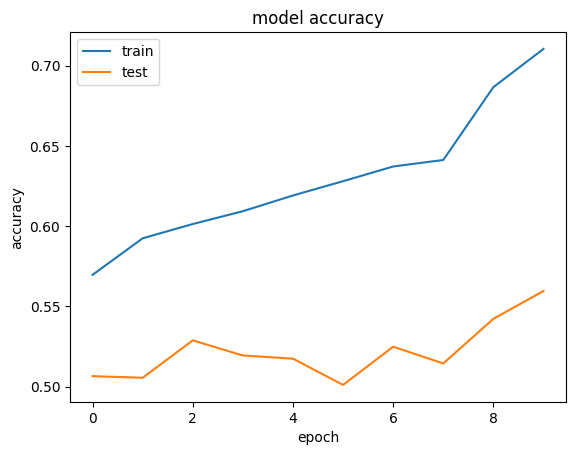

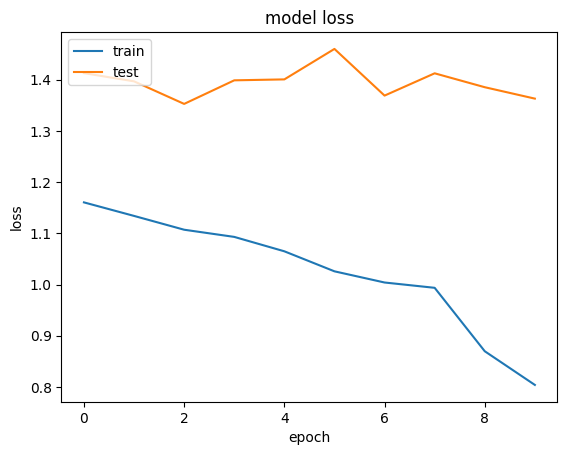

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
model = load_model('vgg19.h5', compile=True)

In [30]:
import cv2
img = 'dataaaaaa/test/Basal Cell Carcinoma/basal-cell-carcinoma-pigmented-51.jpg'
img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
prediction = model.predict(img.reshape(1,32,32,3))
print(np.argmax(prediction))

2


In [58]:
i = cv2.imread('data/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-keratosis-5FU-13.jpg')
  
# Displaying the image
cv2.imshow('image', i)

In [27]:
import cv2
img = 'data/test/Nail Fungus and other Nail Disease/habit-tic-deformity-19.jpg'
img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
prediction = model.predict(img.reshape(1,32,32,3))
print(np.argmax(prediction))

5
